<a href="https://colab.research.google.com/github/rajeshpahari/Own-Work/blob/ML/ML001_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

# Library Section

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
display.set_matplotlib_formats('svg')

# Data Import

In [ ]:
# !pip install kaggle
# !mkdir ~/.kaggle
# !cp kaggle.json ~/.kaggle
# !chmod 600 ~/.kaggle/kaggle.json
# !kaggle datasets download -d 'amitabhajoy/bengaluru-house-price-data'
# !unzip /content/bengaluru-house-price-data.zip


In [ ]:
#Data Import in a dataframe
df=pd.read_csv('/content/Bengaluru_House_Data.csv')
df.head()

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00

# Data Inspection and  Clean-up

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [ ]:
# We can see there are missing values..lets find out how many..
missing_values=pd.DataFrame(df.isnull().sum()[df.isnull().sum()>0 ])
missing_values[0]


location       1
size          16
society     5502
bath          73
balcony      609
Name: 0, dtype: int64

In [ ]:
#Lets work on location Missing Value
print(df[df.location.isnull()])
print('\n.................')
# print(df.location.unique())
# print('\n.....................')
# print(df.groupby('location')['price'].mean().sort_values())
df[df.society=='Grare S']
#Lets replace the nan value with Anantapura
df.loc[568,'location']='Anantapura'
df[df.society=='Grare S']

missing_values=pd.DataFrame(df.isnull().sum()[df.isnull().sum()>0 ])
missing_values[0]

                area_type   availability location   size  society total_sqft  \
568  Super built-up  Area  Ready To Move      NaN  3 BHK  Grare S       1600   

     bath  balcony  price  
568   3.0      2.0   86.0  

.................


size         16
society    5502
bath         73
balcony     609
Name: 0, dtype: int64

In [ ]:
#@title Default title text
#################For the tme being we will drop these Null Value columns....
#################@# We need to find out Later if we can Impute values

#lets work on Missing Values of Scociety
#How much % of total Data is missing?
print(f'%g%% of Socity data from total data is missing '%(df.society.isnull().sum()/len(df)*100))
#We can't drop these 41% data..lets see if these can be imputed
# print('\n......................')
# print(df[df.society.isnull()]['location'])
# print('\n......................')
# df[df.location=='Uttarahalli']['society'].isnull()
# df.head()

41.3063% of Socity data from total data is missing 


In [ ]:
# We can either drop 43% data of total data...or we can drop the feature ..
##We will experiment it later which option can give better result
## May be it can be discussed with SME whether a build quality of society and its culture can contribute in pricing..
##its   highly likely Society will have impact on price.

df.drop('society',axis=1,inplace=True)
df.head()

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

  total_sqft  bath  balcony   price  
0       1056   2.0      1.0   39.07  
1       2600   5.0      3.0  120.00  
2       1440   2.0      3.0   62.00  
3       1521   3.0      1.0   95.00  
4       1200   2.0      1.0   51.00

In [ ]:
#lets examine other Missing data
missing_values=pd.DataFrame(df.isnull().sum()[df.isnull().sum()>0 ])
missing_values[0]

size        16
bath        73
balcony    609
Name: 0, dtype: int64

In [ ]:
#Lets work on size
print(df[(df['size'].isnull()) & (df['balcony'].isnull()) & (df['bath'].isnull())])

#Lets delete these 16 rows
df=df[~((df['size'].isnull()) & (df['balcony'].isnull()) & (df['bath'].isnull()))]

#Inspect deletion
df[(df['size'].isnull()) & (df['balcony'].isnull()) & (df['bath'].isnull())]



        area_type          availability        location size   total_sqft  \
579    Plot  Area  Immediate Possession  Sarjapur  Road  NaN  1200 - 2400   
1775   Plot  Area  Immediate Possession        IVC Road  NaN  2000 - 5634   
2264   Plot  Area  Immediate Possession    Banashankari  NaN         2400   
2809   Plot  Area  Immediate Possession  Sarjapur  Road  NaN  1200 - 2400   
2862   Plot  Area  Immediate Possession     Devanahalli  NaN  1500 - 2400   
5333   Plot  Area  Immediate Possession     Devanahalli  NaN  2100 - 5405   
6423   Plot  Area  Immediate Possession      Whitefield  NaN         2324   
6636   Plot  Area  Immediate Possession          Jigani  NaN         1500   
6719   Plot  Area  Immediate Possession         Hoskote  NaN   800 - 2660   
7680   Plot  Area  Immediate Possession    Kasavanhalli  NaN         5000   
8306   Plot  Area  Immediate Possession          Anekal  NaN         1453   
8565   Plot  Area  Immediate Possession      Carmelaram  NaN         2000   

Empty DataFrame
Columns: [area_type, availability, location, size, total_sqft, bath, balcony, price]
Index: []

In [ ]:
#lets examine other Missing data again
missing_values=pd.DataFrame(df.isnull().sum()[df.isnull().sum()>0 ])
missing_values[0]

bath        57
balcony    593
Name: 0, dtype: int64

In [ ]:
#Lets check if all null Batch is having a null value in balcony
print(df[(df['balcony'].isnull()) & (df['bath'].isnull())].count())

#Lets drop those rows
df=df[~( (df['balcony'].isnull()) & (df['bath'].isnull()))]

#Inspect deletion
df[(df['balcony'].isnull()) & (df['bath'].isnull())]

area_type       57
availability    57
location        57
size            57
total_sqft      57
bath             0
balcony          0
price           57
dtype: int64


Empty DataFrame
Columns: [area_type, availability, location, size, total_sqft, bath, balcony, price]
Index: []

In [ ]:
#lets examine other Missing data again
missing_values=pd.DataFrame(df.isnull().sum()[df.isnull().sum()>0 ])
missing_values[0]

balcony    536
Name: 0, dtype: int64

In [ ]:
# Before we work on Balcony...lets make the bedroom value in synch
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [ ]:
#lets Create one column
df['bedroom']=df['size'].apply(lambda x: int(str(x).split(' ')[0]))
df.head()

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

  total_sqft  bath  balcony   price  bedroom  
0       1056   2.0      1.0   39.07        2  
1       2600   5.0      3.0  120.00        4  
2       1440   2.0      3.0   62.00        3  
3       1521   3.0      1.0   95.00        3  
4       1200   2.0      1.0   51.00        2

In [ ]:
#Lets see if there is any relation of bedroom and balcony
df.groupby('bedroom')['balcony'].value_counts()


bedroom  balcony
1        1.0         425
         0.0         186
         2.0          35
         3.0           2
2        1.0        2735
         2.0        2062
         0.0         355
         3.0         328
3        2.0        2331
         1.0        1245
         3.0         861
         0.0         219
4        2.0         458
         1.0         324
         3.0         287
         0.0         169
5        2.0         100
         1.0          95
         3.0          65
         0.0          39
6        2.0          69
         3.0          57
         1.0          39
         0.0          27
7        3.0          33
         2.0          27
         1.0          15
         0.0          10
8        2.0          23
         3.0          20
         0.0          15
         1.0          10
9        3.0          14
         1.0           9
         2.0           7
         0.0           4
10       3.0           3
11       3.0           2
         0.0           1
12      

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


2     5527
3     4833
4     1395
1      649
5      353
6      221
7      100
8       89
9       54
10      14
11       4
27       1
19       1
16       1
43       1
14       1
12       1
13       1
18       1
Name: bedroom, dtype: int64


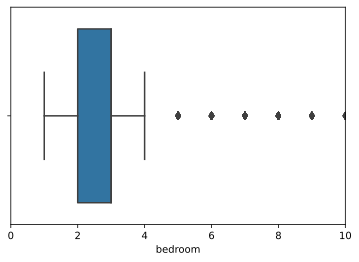

In [ ]:
#We will comeback here later ...first lets see the bedroom distributions
plt.xlim([0,10])
sns.boxplot(df.bedroom)
print(df.bedroom.value_counts())
#We will remove data where bedroom > 10...Those we will consider as outliers for our cases
df=df[~(df.bedroom>10)]


In [ ]:
df.groupby('bedroom')['balcony'].value_counts()
df.groupby('balcony')['bedroom'].value_counts()
#houses more than 4 bedroom but no bath doesn't make any sense..lets exclude those
df=df[~((df.balcony==0)&(df.bedroom>4))]


In [ ]:
df.isnull().sum()

area_type         0
availability      0
location          0
size              0
total_sqft        0
bath              0
balcony         532
price             0
bedroom           0
dtype: int64

<AxesSubplot:>

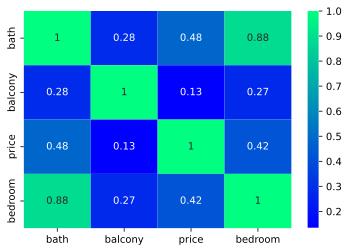

In [ ]:
#lets observe data
#df[df.balcony.isnull()]
#is there a co-relation between price, bed and bath?
sns.heatmap(df.corr(),annot=True,cmap='winter')

In [ ]:
#Only 4% data
print(f'Null Balcony dats %g%% of total data' %(df.balcony.isnull().sum()/len(df)))
#lets remove it
df.dropna(axis=0,inplace=True)
df.balcony.isnull().sum()

Null Balcony dats 0.0404871% of total data


0

In [ ]:
df.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
bedroom         0
dtype: int64

In [ ]:
df.head()
#Lets drop size as we have bedroom
df.drop('size',axis=1,inplace=True)
df.head()

area_type   availability                  location total_sqft  \
0  Super built-up  Area         19-Dec  Electronic City Phase II       1056   
1            Plot  Area  Ready To Move          Chikka Tirupathi       2600   
2        Built-up  Area  Ready To Move               Uttarahalli       1440   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli       1521   
4  Super built-up  Area  Ready To Move                  Kothanur       1200   

   bath  balcony   price  bedroom  
0   2.0      1.0   39.07        2  
1   5.0      3.0  120.00        4  
2   2.0      3.0   62.00        3  
3   3.0      1.0   95.00        3  
4   2.0      1.0   51.00        2

In [ ]:
#Lets work on availibility
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12608 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12608 non-null  object 
 1   availability  12608 non-null  object 
 2   location      12608 non-null  object 
 3   total_sqft    12608 non-null  object 
 4   bath          12608 non-null  float64
 5   balcony       12608 non-null  float64
 6   price         12608 non-null  float64
 7   bedroom       12608 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 886.5+ KB


In [ ]:
from pandas.core.internals.blocks import to_native_types
df.availability.unique()

df.availability=df.availability.replace('Ready To Move','23-Mar')

df.availability.unique()


array(['19-Dec', '23-Mar', '18-Feb', '18-Nov', '18-May', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '18-Apr',
       '20-Aug', '19-Mar', '17-Sep', '18-Dec', '17-Aug', '19-Apr',
       '18-Jun', '22-Dec', '22-Jan', '18-Aug', '19-Jan', '17-Jul',
       '18-Jul', '21-Jun', '20-May', '19-Aug', '18-Sep', '17-May',
       '17-Jun', '18-Oct', '21-May', '18-Jan', '20-Mar', '17-Dec',
       '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb', '19-May',
       '17-Nov', '20-Oct', '20-Jun', '19-Feb', '21-Oct', '21-Jan',
       '17-Mar', '17-Apr', '22-May', '19-Oct', '21-Jul', '21-Nov',
       '21-Mar', '16-Dec', '22-Mar', '20-Jan', '21-Sep', '21-Aug',
       '14-Nov', '19-Nov', '16-Jul', '15-Jun', '20-Nov', '20-Jul',
       '16-Sep', '20-Feb', '15-Dec', '16-Oct', '22-Nov', '15-Aug',
       '17-Jan', '16-Nov', '20-Apr', '16-Jan', '17-Feb', '14-Jul'],
      dtype=object)

In [ ]:
#from Availibility we wil extract year only
df['year_avail']=df.availability.apply(lambda x: int(str(x).split('-')[0]))
df.head()

area_type availability                  location total_sqft  \
0  Super built-up  Area       19-Dec  Electronic City Phase II       1056   
1            Plot  Area       23-Mar          Chikka Tirupathi       2600   
2        Built-up  Area       23-Mar               Uttarahalli       1440   
3  Super built-up  Area       23-Mar        Lingadheeranahalli       1521   
4  Super built-up  Area       23-Mar                  Kothanur       1200   

   bath  balcony   price  bedroom  year_avail  
0   2.0      1.0   39.07        2          19  
1   5.0      3.0  120.00        4          23  
2   2.0      3.0   62.00        3          23  
3   3.0      1.0   95.00        3          23  
4   2.0      1.0   51.00        2          23

In [ ]:
df.drop(['availability'],axis=1,inplace=True)
df.head()

area_type                  location total_sqft  bath  balcony  \
0  Super built-up  Area  Electronic City Phase II       1056   2.0      1.0   
1            Plot  Area          Chikka Tirupathi       2600   5.0      3.0   
2        Built-up  Area               Uttarahalli       1440   2.0      3.0   
3  Super built-up  Area        Lingadheeranahalli       1521   3.0      1.0   
4  Super built-up  Area                  Kothanur       1200   2.0      1.0   

    price  bedroom  year_avail  
0   39.07        2          19  
1  120.00        4          23  
2   62.00        3          23  
3   95.00        3          23  
4   51.00        2          23

In [ ]:
print(df.total_sqft.unique())

['1056' '2600' '1440' ... '1133 - 1384' '774' '4689']


In [ ]:
#Some example for regular expression
import re
s='2021SQFT-'
print(re.findall(r'[0-9]',s))
print(''.join(re.findall(r'[0-9]',s)))


['2', '0', '2', '1']
2021


In [ ]:
# for i in df.total_sqft:
  
#   print(i+' :'+''.join(re.findall(r'[0,9]',i)))

In [ ]:
# The problem in above code is its making following strings 2021 - 9800 as 20219088..
#No issue we will store the extracted value in different columns & Modify those values

df['totalsqft']=df['total_sqft'].apply(lambda x: (''.join(re.findall(r'[0-9]',x))))
df.head()

area_type                  location total_sqft  bath  balcony  \
0  Super built-up  Area  Electronic City Phase II       1056   2.0      1.0   
1            Plot  Area          Chikka Tirupathi       2600   5.0      3.0   
2        Built-up  Area               Uttarahalli       1440   2.0      3.0   
3  Super built-up  Area        Lingadheeranahalli       1521   3.0      1.0   
4  Super built-up  Area                  Kothanur       1200   2.0      1.0   

    price  bedroom  year_avail totalsqft  
0   39.07        2          19      1056  
1  120.00        4          23      2600  
2   62.00        3          23      1440  
3   95.00        3          23      1521  
4   51.00        2          23      1200

In [ ]:
#Now there were few values which are having structure like xxxx - yyyy ..
# we have to take mean of those and put it in correspending new column

# for i in df.total_sqft:
#   if '-' in i:
#     print(i,int(i.split('-')[0]),int(i.split('-')[1]))
#     print(((int(i.split('-')[0]))+(int(i.split('-')[1])))/2)
 

def find_mean_sqft(x):
  y=x.split('-')
  if len(y)==2:
    return(float(y[0])+float(y[1]))/2
  else:
    return float(x)



In [ ]:
df['total_sqft']=df['totalsqft'].apply(find_mean_sqft)

In [ ]:
df.total_sqft.nunique()

1953

In [ ]:
##Lets Create one column which is price per squerefeet..here price is in lakhs
df['price_per_sqft']=(df.price *100000/df.total_sqft)
df.head()

area_type                  location  total_sqft  bath  balcony  \
0  Super built-up  Area  Electronic City Phase II      1056.0   2.0      1.0   
1            Plot  Area          Chikka Tirupathi      2600.0   5.0      3.0   
2        Built-up  Area               Uttarahalli      1440.0   2.0      3.0   
3  Super built-up  Area        Lingadheeranahalli      1521.0   3.0      1.0   
4  Super built-up  Area                  Kothanur      1200.0   2.0      1.0   

    price  bedroom  year_avail totalsqft  price_per_sqft  
0   39.07        2          19      1056     3699.810606  
1  120.00        4          23      2600     4615.384615  
2   62.00        3          23      1440     4305.555556  
3   95.00        3          23      1521     6245.890861  
4   51.00        2          23      1200     4250.000000

In [ ]:
#Drop price
df.drop(['price','totalsqft'],axis=1,inplace=True)
df.head()

area_type                  location  total_sqft  bath  balcony  \
0  Super built-up  Area  Electronic City Phase II      1056.0   2.0      1.0   
1            Plot  Area          Chikka Tirupathi      2600.0   5.0      3.0   
2        Built-up  Area               Uttarahalli      1440.0   2.0      3.0   
3  Super built-up  Area        Lingadheeranahalli      1521.0   3.0      1.0   
4  Super built-up  Area                  Kothanur      1200.0   2.0      1.0   

   bedroom  year_avail  price_per_sqft  
0        2          19     3699.810606  
1        4          23     4615.384615  
2        3          23     4305.555556  
3        3          23     6245.890861  
4        2          23     4250.000000

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_per_sqft'>

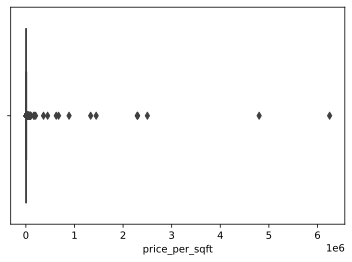

In [ ]:
#Lets see the distribution of price
sns.boxplot(df.price_per_sqft)



In [ ]:
#This may not be correct impression of price outliers. lets pic-up a range f 1-50k per squerefeet..
##lets observe which are not these kind of data
df[~((df.price_per_sqft>1000)& (df.price_per_sqft<50000))]

#df[df.location=='Kengeri'].price_per_sqft.mean()

#lets exclude the outliers
df=df[((df.price_per_sqft>1000)& (df.price_per_sqft<50000))]


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_per_sqft'>

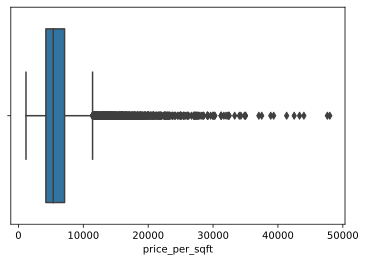

In [ ]:
#Does Area type matter? as we caculate price per squerefeet based on total price...lets debate this in a group of expert
# 
sns.boxplot(df.price_per_sqft)

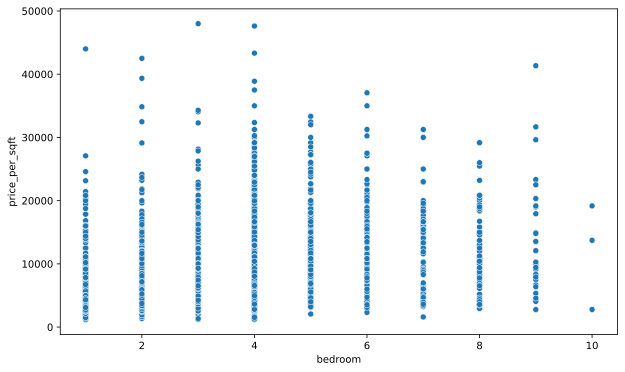

In [ ]:
#bedroom & price relation ship..observe some of the data may not look correct...but we are not sure untill we observe those data
plt.figure(figsize=(10,6))
sns.scatterplot(y=df.price_per_sqft,x=df.bedroom);

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


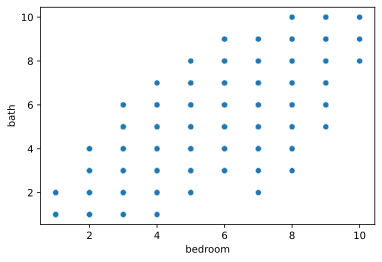

In [ ]:
sns.scatterplot(df.bedroom,y=df.bath);
#kind of liner relationship..which is convincing

In [ ]:
sns.scatterplot(df.bedroom,y=df.bath,hue=df.balcony);
#kind of liner relationship..which is convincing somehow....more thinking is required

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [ ]:
#Does Area type matter? as we caculate price per squerefeet based on total price...lets make some intution

df.groupby('area_type')['price_per_sqft'].mean()

#Seems there are some relationship

area_type
Built-up  Area           6052.298627
Carpet  Area             6625.440179
Plot  Area              11328.875453
Super built-up  Area     5604.309469
Name: price_per_sqft, dtype: float64

In [ ]:
print(df.info())
#Lets make Area_type and Location as numeric..before that lets check cardianility of location

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12341 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       12341 non-null  object 
 1   location        12341 non-null  object 
 2   total_sqft      12341 non-null  float64
 3   bath            12341 non-null  float64
 4   balcony         12341 non-null  float64
 5   bedroom         12341 non-null  int64  
 6   year_avail      12341 non-null  int64  
 7   price_per_sqft  12341 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 867.7+ KB
None


In [ ]:
loc1=pd.DataFrame(df.groupby('location')['location'].count())
loc1_list=loc1[loc1.location==1].index.to_list()
loc1_list
df['loc']=df.location.apply(lambda x: 'others' if x in loc1_list else x )
df[df['loc']=='others']


area_type                                         location  \
50     Super built-up  Area                                     Adarsh Nagar   
60               Plot  Area                                   Tharabanahalli   
70               Plot  Area                                      Double Road   
80     Super built-up  Area                             Kodanda Reddy Layout   
133              Plot  Area         Ramaswamy Palya - Kammanahalli Main Road   
...                     ...                                              ...   
13192        Built-up  Area                                Sarvobhogam Nagar   
13216  Super built-up  Area                                      Tilak Nagar   
13245  Super built-up  Area  12th cross srinivas nagar banshankari 3rd stage   
13261            Plot  Area                                Havanur extension   
13262        Built-up  Area                                    Abshot Layout   

       total_sqft  bath  balcony  bedroom  year_avail  price_per_sqft     loc  
50         1270.0   2.0      1.0        2          23     3937.007874  others  
60         4395.0   3.0      2.0        3          23     5460.750853  others  
70          500.0   3.0      2.0        3          23    20000.000000  others  
80         1660.0   2.0      2.0        3          23     6325.301205  others  
133        1200.0   4.0      0.0        4          23    17500.000000  others  
...           ...   ...      ...      ...         ...             ...     ...  
13192      1490.0   3.0      0.0        3          23     9395.973154  others  
13216       250.0   2.0      2.0        1          23    16000.000000  others  
13245      1800.0   1.0      1.0        1          23    11111.111111  others  
13261      2000.0   2.0      2.0        3          23    18000.000000  others  
13262      1140.0   1.0      1.0        2          23    16228.070175  others  

[458 rows x 9 columns]

In [ ]:
df.area_type.nunique()

4

In [ ]:
dummies=pd.get_dummies(df[['area_type','loc']],drop_first=True)
df=pd.concat([df,dummies],axis=1)
df.head()

area_type                  location  total_sqft  bath  balcony  \
0  Super built-up  Area  Electronic City Phase II      1056.0   2.0      1.0   
1            Plot  Area          Chikka Tirupathi      2600.0   5.0      3.0   
2        Built-up  Area               Uttarahalli      1440.0   2.0      3.0   
3  Super built-up  Area        Lingadheeranahalli      1521.0   3.0      1.0   
4  Super built-up  Area                  Kothanur      1200.0   2.0      1.0   

   bedroom  year_avail  price_per_sqft                       loc  \
0        2          19     3699.810606  Electronic City Phase II   
1        4          23     4615.384615          Chikka Tirupathi   
2        3          23     4305.555556               Uttarahalli   
3        3          23     6245.890861        Lingadheeranahalli   
4        2          23     4250.000000                  Kothanur   

   area_type_Carpet  Area  ...  loc_Yelahanka New Town  loc_Yelenahalli  \
0                       0  ...                       0                0   
1                       0  ...                       0                0   
2                       0  ...                       0                0   
3                       0  ...                       0                0   
4                       0  ...                       0                0   

   loc_Yemlur  loc_Yeshwanthpur  loc_Yeshwanthpur Industrial Suburb  \
0           0                 0                                   0   
1           0                 0                                   0   
2           0                 0                                   0   
3           0                 0                                   0   
4           0                 0                                   0   

   loc_cooketown  loc_frazertown  loc_manyata park  loc_others  loc_tc.palya  
0              0               0                 0           0             0  
1              0               0                 0           0             0  
2              0               0                 0           0             0  
3              0               0                 0           0             0  
4              0               0                 0           0             0  

[5 rows x 794 columns]

In [ ]:
df.drop(['area_type','location','loc'],axis=1,inplace=True)
df.head()

total_sqft  bath  balcony  bedroom  year_avail  price_per_sqft  \
0      1056.0   2.0      1.0        2          19     3699.810606   
1      2600.0   5.0      3.0        4          23     4615.384615   
2      1440.0   2.0      3.0        3          23     4305.555556   
3      1521.0   3.0      1.0        3          23     6245.890861   
4      1200.0   2.0      1.0        2          23     4250.000000   

   area_type_Carpet  Area  area_type_Plot  Area  \
0                       0                     0   
1                       0                     1   
2                       0                     0   
3                       0                     0   
4                       0                     0   

   area_type_Super built-up  Area  loc_ Devarachikkanahalli  ...  \
0                               1                         0  ...   
1                               0                         0  ...   
2                               0                         0  ...   
3                               1                         0  ...   
4                               1                         0  ...   

   loc_Yelahanka New Town  loc_Yelenahalli  loc_Yemlur  loc_Yeshwanthpur  \
0                       0                0           0                 0   
1                       0                0           0                 0   
2                       0                0           0                 0   
3                       0                0           0                 0   
4                       0                0           0                 0   

   loc_Yeshwanthpur Industrial Suburb  loc_cooketown  loc_frazertown  \
0                                   0              0               0   
1                                   0              0               0   
2                                   0              0               0   
3                                   0              0               0   
4                                   0              0               0   

   loc_manyata park  loc_others  loc_tc.palya  
0                 0           0             0  
1                 0           0             0  
2                 0           0             0  
3                 0           0             0  
4                 0           0             0  

[5 rows x 791 columns]

In [ ]:
df.shape

(12341, 791)

# DataSplit 

In [ ]:
X=df.drop('price_per_sqft',axis=1)
y=df.price_per_sqft
X.shape,y.shape

((12341, 790), (12341,))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
#Model Creation and training
from sklearn.linear_model import LinearRegression

model=LinearRegression()#With No parameter
model.fit(X_train,y_train)



LinearRegression()

In [ ]:
#Evaluation
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('Evaluation of Model with No parameter')
print('*****************')
print('-----------------')
print('*****************\n')
print('Model Score- Training:',model.score(X_train,y_train))
print('Model Score- Testing:',model.score(X_test,y_test))
print('-----------------')
print('Mean Absolute Error:Train:',mean_absolute_error(y_train,model.predict(X_train)))
print('Mean Absolute Error:Test:',mean_absolute_error(y_test,model.predict(X_test)))

print('-----------------')
print('RMSE:Train:',np.sqrt(mean_squared_error(y_train,model.predict(X_train))))
print('RMSE:Test:',np.sqrt(mean_absolute_error(y_test,model.predict(X_test))))


Evaluation of Model with No parameter
*****************
-----------------
*****************

Model Score- Training: 0.6003453350266665
Model Score- Testing: 0.5138583743026253
-----------------
Mean Absolute Error:Train: 1506.292705790154
Mean Absolute Error:Test: 1674.042280764391
-----------------
RMSE:Train: 2496.6666999668337
RMSE:Test: 40.91506178370492


# Decision tree regressor

In [ ]:
#Model Creation and training
from sklearn.tree import DecisionTreeRegressor

model=DecisionTreeRegressor()#With No parameter
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
#Evaluation
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('Evaluation of Model with No parameter')
print('*****************')
print('-----------------')
print('*****************\n')
print('Model Score- Training:',model.score(X_train,y_train))
print('Model Score- Testing:',model.score(X_test,y_test))
print('-----------------')
print('Mean Absolute Error:Train:',mean_absolute_error(y_train,model.predict(X_train)))
print('Mean Absolute Error:Test:',mean_absolute_error(y_test,model.predict(X_test)))

print('-----------------')
print('RMSE:Train:',np.sqrt(mean_squared_error(y_train,model.predict(X_train))))
print('RMSE:Test:',np.sqrt(mean_absolute_error(y_test,model.predict(X_test))))


#Overfitted

Evaluation of Model with No parameter
*****************
-----------------
*****************

Model Score- Training: 0.9849108258583246
Model Score- Testing: 0.3442618812287742
-----------------
Mean Absolute Error:Train: 74.68692425034823
Mean Absolute Error:Test: 1658.3985713037373
-----------------
RMSE:Train: 485.12187793149536
RMSE:Test: 40.7234400720732


#Parametric experiment for decision tree Regressor

In [ ]:
max_depth=np.arange(1,400,50)
max_depth
#print(len(max_depth))
trainscore=[]
testscore=[]
for i  in range(len(max_depth)):
  #Model Creation and training


  # print(max_depth[i])
  model=DecisionTreeRegressor(max_depth=max_depth[i])#With No parameter
  model.fit(X_train,y_train)
  trainscore.append((model.score(X_train,y_train)*100))
  testscore.append((model.score(X_test,y_test))*100)



8
1
51
101
151
201
251
301
351


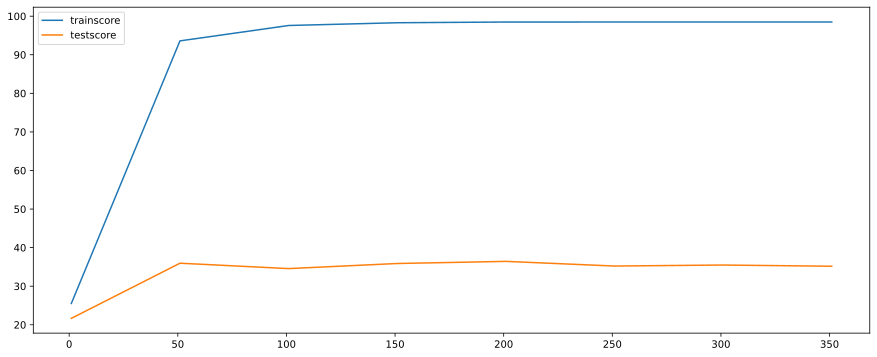

In [ ]:
#Plot the result
plt.figure(figsize=(15,6))

plt.plot(max_depth,trainscore,label='trainscore')
plt.plot(max_depth,testscore,label='testscore')
plt.legend()

In [ ]:
#Lets experiment with Other Hyperparameters later

# Random Forest- Ensemble method

In [ ]:
from joblib.parallel import BatchCompletionCallBack
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()#With No parameter
model=RandomForestRegressor(n_estimators=20)#With No parameter
model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=20)

In [ ]:
#Evaluation
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('Evaluation of Model with No parameter')
print('*****************')
print('-----------------')
print('*****************\n')
print('Model Score- Training:',model.score(X_train,y_train))
print('Model Score- Testing:',model.score(X_test,y_test))
print('-----------------')
print('Mean Absolute Error:Train:',mean_absolute_error(y_train,model.predict(X_train)))
print('Mean Absolute Error:Test:',mean_absolute_error(y_test,model.predict(X_test)))

print('-----------------')
print('RMSE:Train:',np.sqrt(mean_squared_error(y_train,model.predict(X_train))))
print('RMSE:Test:',np.sqrt(mean_absolute_error(y_test,model.predict(X_test))))

Evaluation of Model with No parameter
*****************
-----------------
*****************

Model Score- Training: 0.9109774097897576
Model Score- Testing: 0.5058689469741817
-----------------
Mean Absolute Error:Train: 592.3789473726819
Mean Absolute Error:Test: 1443.7212938667321
-----------------
RMSE:Train: 1178.3335374782528
RMSE:Test: 37.99633263706817


# Parameteric Experiment

In [ ]:
tree_sz=np.arange(1,100,20)

#print(len(max_depth))
trainscore=[]
testscore=[]
for i  in range(len(tree_sz)):
  #Model Creation and training


  # print(max_depth[i])
  model=RandomForestRegressor(n_estimators=tree_sz[i])#With No parameter
  model.fit(X_train,y_train)
  trainscore.append((model.score(X_train,y_train)*100))
  testscore.append((model.score(X_test,y_test))*100)

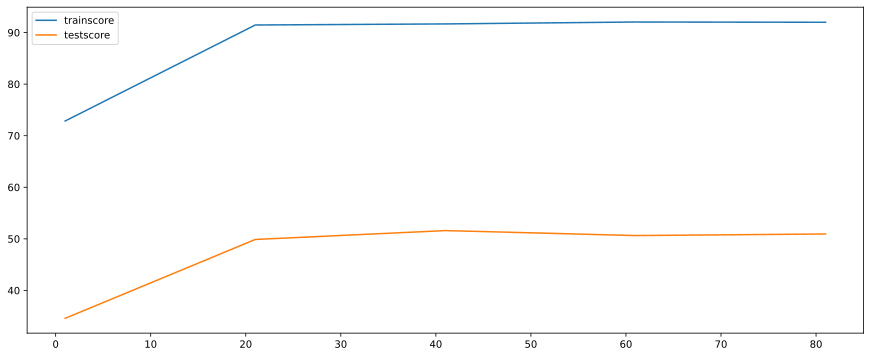

In [ ]:
#Plot the result
plt.figure(figsize=(15,6))

plt.plot(tree_sz,trainscore,label='trainscore')
plt.plot(tree_sz,testscore,label='testscore')
plt.legend()

# Feature Scaling